In [4]:
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import tensorflow
import seaborn as sns

dataset = keras.datasets.fashion_mnist
((imagens_treino, identificacoes_treino), (imangens_teste, identificacoes_teste)) = dataset.load_data()

### Verificando dados

In [2]:
print('Treino', imagens_treino.shape)
print('Teste', imangens_teste.shape)

Treino (60000, 28, 28)
Teste (10000, 28, 28)


### Exemplo de imagem

Text(0.5, 1.0, '9')

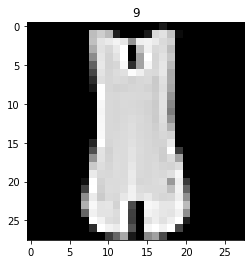

In [3]:
plt.imshow(imagens_treino[4], cmap='gray')
plt.title(identificacoes_treino[0])

### Verificando quantidade de labels

In [4]:
total_de_classificacoes = len(np.unique(identificacoes_treino))
total_de_classificacoes

10

### Sample de imagens

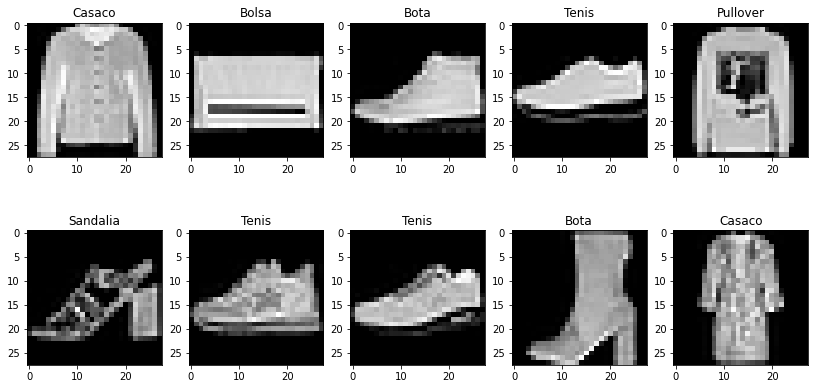

In [5]:
# Definindo nomes para as labels

nomes_labels = {
    0 : 'Camiseta',
    1 :	'Calça',
    2 :	'Pullover',
    3 :	'Vestido',
    4 :	'Casaco',
    5 :	'Sandalia',
    6 :	'Camisa',
    7 :	'Tenis',
    8 :	'Bolsa',
    9 :	'Bota'
}

imagens = np.random.uniform(0, 60000, 10).astype(int)
j = 1
plt.figure(figsize=(14,7))
for i in imagens:
    plt.subplot(2, 5, j)
    plt.imshow(imagens_treino[i], cmap='gray')
    plt.title(nomes_labels[identificacoes_treino[i]])
    j+=1



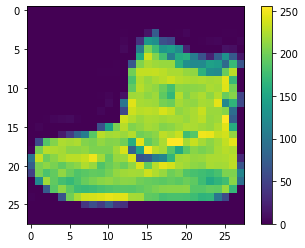

In [6]:
plt.imshow(imagens_treino[0])
plt.colorbar()

### Criação do modelo

In [6]:
# Normalização
imagens_treino_normalizada = imagens_treino/255.0

### Criação, compilação, salvamento e ajuste do modelo com normalização

In [36]:
modelo = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(256, activation=tensorflow.nn.relu),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation=tensorflow.nn.softmax)
])
modelo.compile(optimizer='adam', 
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

historico = modelo.fit(
    imagens_treino_normalizada, identificacoes_treino, 
    epochs=24, validation_split=0.2, 
)

Epoch 1/24
1500/1500 [==============================] - 2s 1ms/step - loss: 0.5296 - accuracy: 0.8102 - val_loss: 0.4224 - val_accuracy: 0.8482
Epoch 2/24
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3992 - accuracy: 0.8547 - val_loss: 0.3684 - val_accuracy: 0.8668
Epoch 3/24
1500/1500 [==============================] - 2s 2ms/step - loss: 0.3646 - accuracy: 0.8651 - val_loss: 0.3618 - val_accuracy: 0.8661
Epoch 4/24
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3408 - accuracy: 0.8748 - val_loss: 0.3287 - val_accuracy: 0.8792
Epoch 5/24
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3219 - accuracy: 0.8795 - val_loss: 0.3412 - val_accuracy: 0.8741
Epoch 6/24
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3088 - accuracy: 0.8845 - val_loss: 0.3271 - val_accuracy: 0.8804
Epoch 7/24
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2979 - accuracy: 0.8884 - val_loss: 0.3158 - val_accuracy:

### Checando acuracia do modelo por épocas

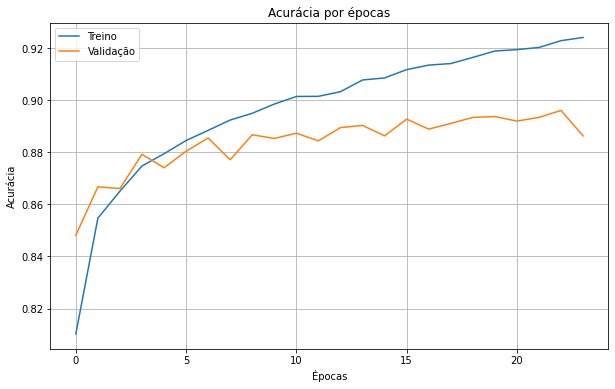

In [39]:
def plot_acuracia_por_epocas(historico):    
    plt.figure(figsize=(10,6))
    plt.plot(historico.history['accuracy'])
    plt.plot(historico.history['val_accuracy'])
    plt.legend(['Treino', 'Validação'])
    plt.title('Acurácia por épocas')
    plt.xlabel('Épocas')
    plt.ylabel('Acurácia')
    plt.grid()

plot_acuracia_por_epocas(historico)

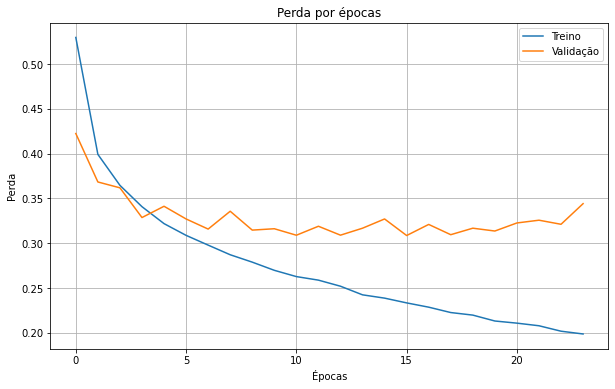

In [40]:
def plot_perda_por_epocas(historico):    
    plt.figure(figsize=(10,6))
    plt.plot(historico.history['loss'])
    plt.plot(historico.history['val_loss'])
    plt.legend(['Treino', 'Validação'])
    plt.title('Perda por épocas')
    plt.xlabel('Épocas')
    plt.ylabel('Perda')
    plt.grid()
plot_perda_por_epocas(historico)

### Teste específico do modelo

In [11]:
testes = modelo.predict(imangens_teste)
print(f'Resultado teste: {np.argmax(testes[1])}')
print(f'Classificacão real: {identificacoes_teste[1]}' )

Resultado teste: 2
Classificacão real: 2


In [12]:
modelo.evaluate(imangens_teste, identificacoes_teste)

313/313 [==============================] - 0s 1ms/step - loss: 65.4212 - accuracy: 0.8723


[65.42121887207031, 0.8723000288009644]

# Entendendo o funcionamento do modelo

### Sumário do modelo

In [16]:
sumario_do_modelo = modelo.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


### Pesos da primeira camada dense

In [38]:
pesos_da_camada_dense = modelo.layers[1].get_weights()[0]
pesos_da_camada_dense

array([[ 1.1303311e-01, -2.1473072e-01,  3.6303446e-01, ...,
        -2.8934266e-02, -1.9381940e-04, -1.9163041e-01],
       [-1.6491856e-02,  3.2302868e-01, -2.4891452e-01, ...,
         4.8677111e-03,  6.7788519e-02, -4.9325965e-02],
       [-4.4303080e-01,  5.4496497e-01,  8.7789088e-02, ...,
        -8.4099114e-02, -9.3236156e-02,  5.5461764e-01],
       ...,
       [-1.1477117e-01,  4.2961255e-01, -6.8267480e-02, ...,
        -5.1282216e-02,  8.8909246e-02,  1.5294132e-01],
       [-4.6504548e-01,  3.9029334e-02,  2.7973458e-01, ...,
         1.2984273e-02, -6.7091294e-02,  1.0583311e+00],
       [ 4.1480461e-01,  2.1961421e-02,  2.7023476e-01, ...,
         1.0244951e-02,  2.7715953e-02,  4.6185488e-01]], dtype=float32)

In [44]:
pesos_camada_dense_zerados = np.zeros(pesos_da_camada_dense.shape
)
pesos_camada_dense_aleatorios = np.random.rand(784,256)


modelo.layers[1].set_weights([pesos_camada_dense_aleatorios, vieses_da_camada_dense])

historico = modelo.fit(
    imagens_treino_normalizada, identificacoes_treino, 
    epochs=24, validation_split=0.2, 
)

Epoch 1/24
1500/1500 [==============================] - 2s 1ms/step - loss: 144.0015 - accuracy: 0.5522 - val_loss: 27.6115 - val_accuracy: 0.7703
Epoch 2/24
1500/1500 [==============================] - 2s 2ms/step - loss: 45.0028 - accuracy: 0.6986 - val_loss: 16.3493 - val_accuracy: 0.8087
Epoch 3/24
1500/1500 [==============================] - 2s 2ms/step - loss: 22.5127 - accuracy: 0.7537 - val_loss: 11.0314 - val_accuracy: 0.8210
Epoch 4/24
1500/1500 [==============================] - 2s 2ms/step - loss: 11.3236 - accuracy: 0.7849 - val_loss: 6.4220 - val_accuracy: 0.8268
Epoch 5/24
1500/1500 [==============================] - 2s 2ms/step - loss: 5.5180 - accuracy: 0.7927 - val_loss: 2.9897 - val_accuracy: 0.8382
Epoch 6/24
1500/1500 [==============================] - 2s 2ms/step - loss: 2.4874 - accuracy: 0.8015 - val_loss: 1.6854 - val_accuracy: 0.8324
Epoch 7/24
1500/1500 [==============================] - 2s 1ms/step - loss: 1.2845 - accuracy: 0.8121 - val_loss: 0.9678 - val_a

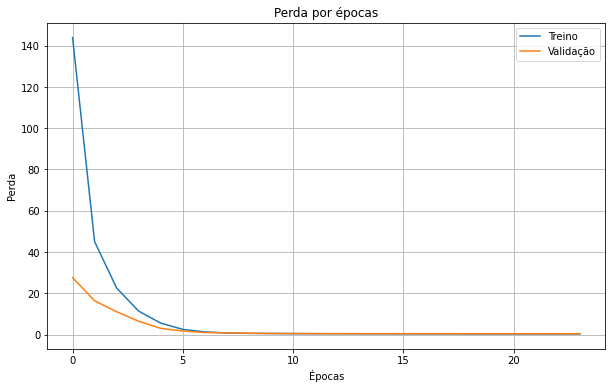

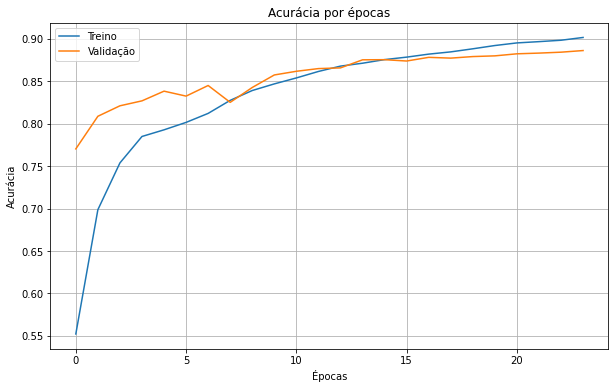

In [45]:
plot_perda_por_epocas(historico)
plot_acuracia_por_epocas(historico)

In [48]:
modelo.get_config()

{'name': 'sequential_1',
 'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 28, 28),
    'dtype': 'float32',
    'sparse': False,
    'ragged': False,
    'name': 'flatten_1_input'}},
  {'class_name': 'Flatten',
   'config': {'name': 'flatten_1',
    'trainable': True,
    'batch_input_shape': (None, 28, 28),
    'dtype': 'float32',
    'data_format': 'channels_last'}},
  {'class_name': 'Dense',
   'config': {'name': 'dense_2',
    'trainable': True,
    'dtype': 'float32',
    'units': 256,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'kernel_regularizer': None,
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_constraint': None,
    'bias_constraint': None}},
  {'class_name': 'Dropout',
   'config': {'name': 'dropout_1',
    'trainable': True,
    'dtype': 'float32',
  

### Exploraçao dos vieses da camada dense

In [49]:
vieses_da_camada_dense = modelo.layers[1].get_weights()[1]


In [50]:
vieses_da_camada_dense_zerados = np.zeros(vieses_da_camada_dense.shape)

In [51]:
modelo.layers[1].set_weights([pesos_camada_dense_zerados, vieses_da_camada_dense_zerados])


historico = modelo.fit(
    imagens_treino_normalizada, identificacoes_treino, 
    epochs=24, validation_split=0.2, 
)

Epoch 1/24
1500/1500 [==============================] - 2s 2ms/step - loss: 0.5298 - accuracy: 0.8096 - val_loss: 0.4221 - val_accuracy: 0.8472
Epoch 2/24
1500/1500 [==============================] - 2s 2ms/step - loss: 0.4094 - accuracy: 0.8526 - val_loss: 0.3858 - val_accuracy: 0.8627
Epoch 3/24
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3801 - accuracy: 0.8611 - val_loss: 0.3677 - val_accuracy: 0.8660
Epoch 4/24
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3602 - accuracy: 0.8667 - val_loss: 0.3492 - val_accuracy: 0.8730
Epoch 5/24
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3466 - accuracy: 0.8723 - val_loss: 0.3602 - val_accuracy: 0.8740
Epoch 6/24
1500/1500 [==============================] - 2s 2ms/step - loss: 0.3374 - accuracy: 0.8756 - val_loss: 0.3412 - val_accuracy: 0.8765
Epoch 7/24
1500/1500 [==============================] - 2s 2ms/step - loss: 0.3256 - accuracy: 0.8782 - val_loss: 0.3405 - val_accuracy:

In [52]:
modelo.layers[1].set_weights([pesos_camada_dense_aleatorios, vieses_da_camada_dense_zerados])


historico = modelo.fit(
    imagens_treino_normalizada, identificacoes_treino, 
    epochs=24, validation_split=0.2, 
)

Epoch 1/24
1500/1500 [==============================] - 3s 2ms/step - loss: 123.2067 - accuracy: 0.5545 - val_loss: 25.6681 - val_accuracy: 0.7628
Epoch 2/24
1500/1500 [==============================] - 3s 2ms/step - loss: 38.2437 - accuracy: 0.6983 - val_loss: 20.2372 - val_accuracy: 0.7577
Epoch 3/24
1500/1500 [==============================] - 3s 2ms/step - loss: 18.9131 - accuracy: 0.7494 - val_loss: 9.5042 - val_accuracy: 0.8167
Epoch 4/24
1500/1500 [==============================] - 3s 2ms/step - loss: 9.6635 - accuracy: 0.7790 - val_loss: 5.5039 - val_accuracy: 0.8202
Epoch 5/24
1500/1500 [==============================] - 3s 2ms/step - loss: 5.0816 - accuracy: 0.7833 - val_loss: 3.3406 - val_accuracy: 0.8112
Epoch 6/24
1500/1500 [==============================] - 2s 2ms/step - loss: 2.7253 - accuracy: 0.7893 - val_loss: 1.9479 - val_accuracy: 0.8312
Epoch 7/24
1500/1500 [==============================] - 3s 2ms/step - loss: 1.4847 - accuracy: 0.8049 - val_loss: 1.1503 - val_acc

 ## Alterando hiperparametros

In [18]:
modelo = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(256, activation=tensorflow.nn.relu),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation=tensorflow.nn.softmax)
])

adam = keras.optimizers.Adam(lr=0.001)

callbacks = [
    keras.callbacks.EarlyStopping(monitor = 'val_loss'),
    keras.callbacks.ModelCheckpoint('../modelos/best_model.hdf5',monitor = 'val_accuracy', verbose=1, save_best_only=True)
]

modelo.compile(optimizer=adam, 
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

historico = modelo.fit(
    imagens_treino_normalizada, identificacoes_treino, 
    epochs=10, validation_split=0.2,
    batch_size = 32,
    callbacks = callbacks
)

Epoch 1/10
1471/1500 [============================>.] - ETA: 0s - loss: 0.5333 - accuracy: 0.8108
Epoch 00001: val_accuracy improved from -inf to 0.85075, saving model to ../modelos\best_model.h5
1500/1500 [==============================] - 2s 2ms/step - loss: 0.5309 - accuracy: 0.8114 - val_loss: 0.4055 - val_accuracy: 0.8508
Epoch 2/10
1465/1500 [============================>.] - ETA: 0s - loss: 0.4025 - accuracy: 0.8541
Epoch 00002: val_accuracy improved from 0.85075 to 0.86375, saving model to ../modelos\best_model.h5
1500/1500 [==============================] - 2s 2ms/step - loss: 0.4018 - accuracy: 0.8542 - val_loss: 0.3737 - val_accuracy: 0.8637
Epoch 3/10
1493/1500 [============================>.] - ETA: 0s - loss: 0.3618 - accuracy: 0.8673
Epoch 00003: val_accuracy improved from 0.86375 to 0.86575, saving model to ../modelos\best_model.h5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3621 - accuracy: 0.8672 - val_loss: 0.3740 - val_accuracy: 0.8658
